# Detecci√≥n de Aves de la Selva Misionera con YOLOv5



*Ejemplo de Transferencia de Aprendizaje en Redes Neuronales Artificiales*


**CONTEXTO a tratar:**

Suponga que un experto (https://www.youtube.com/c/SergioMoyaBioAudioVisual) le proporciona im√°genes de especies poco frecuentes de avistar, son locales y por lo tanto no existen muchos registros.

La idea es detectar si este tipo de aves aparecen dentro de los videos/fotograf√≠as tomadas por las c√°maras trampa distribuidas en una reserva protegida. Se tienen registros de varios a√±os, por lo tanto, muchos GB de informaci√≥n a procesar.

La idea es obtener un modelo que permita facilitar esta ardua tarea.

**Ejemplo:**


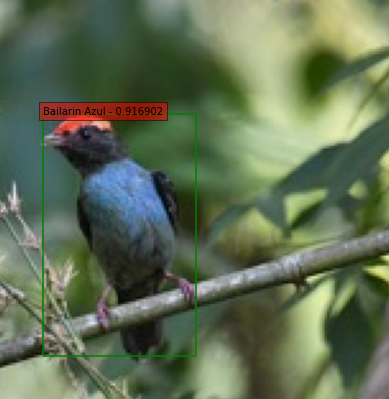


**POSIBLE SOLUCI√ìN:**

Utilizar una RNA, pero al disponer de pocas im√°genes clasificadas con certeza, el proceso de entrenar una red desde cero y con las capacidades solicitadas... se torna inviable.

Podemos utilizar una RNA ya entrenada para una tarea similar, agregar algunas capas para satisfacer nuestras necesidades, y entrenar estas √∫ltimas con nuestro dataset reducido.


**Informaci√≥n adicional:**


*   You Only Look Once (YOLO)
*   https://docs.ultralytics.com/
*   https://github.com/ultralytics/yolov5


**¬øAplicaciones en Ingenier√≠a?**

Lo charlamos despu√©s de ver algunos resultados ü¶æ

## (1) Dataset

En este dataset hay im√°genes a color de 8 tipos de aves misioneras. El tama√±o de cada imagen es de 256x256 pixeles.
A su vez, cada imagen presenta codificadas las etiquetas correspondientes para la identificaci√≥n de las aves.

In [1]:
# Archivos pueden arrastrarse al √°rea de trabajo o procesarse en local

# Version Online
!wget https://github.com/AxelSkrauba/Taller_IA/raw/main/3_RNA_TransferLearning/Aves_processed.zip

--2022-08-24 03:09:55--  https://github.com/AxelSkrauba/Taller_IA/raw/main/3_RNA_TransferLearning/Aves_processed.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AxelSkrauba/Taller_IA/main/3_RNA_TransferLearning/Aves_processed.zip [following]
--2022-08-24 03:09:56--  https://raw.githubusercontent.com/AxelSkrauba/Taller_IA/main/3_RNA_TransferLearning/Aves_processed.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3403454 (3.2M) [application/zip]
Saving to: ‚ÄòAves_processed.zip‚Äô

Aves_processed.zip  100%[===================>]   3.25M  --.-KB/s    in 0.01s   

2022-08-24 03:09:58 (254 

In [2]:
!unzip Aves_processed.zip

Archive:  Aves_processed.zip
   creating: images/
  inflating: images/10_0.jpg         
  inflating: images/10_1.jpg         
  inflating: images/11_0.jpg         
  inflating: images/11_1.jpg         
  inflating: images/12_0.jpg         
  inflating: images/12_1.jpg         
  inflating: images/13_0.jpg         
  inflating: images/13_1.jpg         
  inflating: images/14_0.jpg         
  inflating: images/14_1.jpg         
  inflating: images/15_0.jpg         
  inflating: images/15_1.jpg         
  inflating: images/16_0.jpg         
  inflating: images/16_1.jpg         
  inflating: images/17_0.jpg         
  inflating: images/17_1.jpg         
  inflating: images/18_0.jpg         
  inflating: images/18_1.jpg         
  inflating: images/19_0.jpg         
  inflating: images/19_1.jpg         
  inflating: images/1_0.jpg          
  inflating: images/1_1.jpg          
  inflating: images/20_0.jpg         
  inflating: images/20_1.jpg         
  inflating: images/21_0.jpg         


## (2) Definici√≥n de Train/Val/Test data

Es necesario dividir las im√°genes de nuestro dataset en training, validation y testing. En este paso se copian las im√°genes (con sus archivos de texto de los labels correspondientes) en los siguientes directorios.
Esto se realiza de esta forma, porque YoLo espera una estructura similar.

```
data
   |‚Äî‚Äî‚Äî‚Äî‚Äî‚Äîimages
   |        ‚îî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äîtrain ‚Äî‚Äî <trainimage01>.jpg
   |        |               <trainimage02>.jpg
   |        |                      :
   |        ‚îî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äîval   ‚Äî‚Äî <valimage01>.jpg
   |        |               <valimage02>.jpg
   |        |                      :
   |        ‚îî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äîtest ‚Äî‚Äî <testimage01>.jpg
   |        |               <testimage02>.jpg
   |        |                      :
   ‚îî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äîlabels
   |        ‚îî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äîtrain ‚Äî‚Äî <trainimage01>.txt
   |        |               <trainimage02>.txt
   |        |                      :
   |        ‚îî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äîval   ‚Äî‚Äî <valimage01>.txt
   |        |               <valimage02>.txt
   |        |                      :
   |        ‚îî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äîtest ‚Äî‚Äî <testimage01>.txt
   |        |               <testimage02>.txt
   |        |                      :
```


In [3]:
!mkdir data
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test
!mkdir data/labels
!mkdir data/labels/train
!mkdir data/labels/val
!mkdir data/labels/test

In [4]:
from tqdm.auto import tqdm
import os, fnmatch

def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names


In [5]:
import numpy as np
SEED = 777
np.random.seed(SEED)


p_train = 0.70  # 70% del total de los datos son training
p_val   = 0.10  # 10% de los datos de training son de validaci√≥n


d = dirfiles('images/','*.jpg')
m = len(d) # n√∫mero de imagenes

nt = round(p_train*m)
nv = round(p_val*nt)

ii = np.vstack([np.zeros((nt-nv,1)),np.ones((nv,1)),2*np.ones((m-nt,1))])
np.random.shuffle(ii) # Aleatorio


target = ['train','val','test']

for i in tqdm(range(m)):
  fname            = d[i]
  tname            = fname[:-3]+'txt'
  ti               = target[int(ii[i])]
  source_file      = 'images/'+fname
  destination_file = 'data/images/'+ti 
  os.system('cp ' + source_file + ' ' + destination_file) 
  source_file      = 'labels/'+tname
  destination_file = 'data/labels/'+ti 
  os.system('cp ' + source_file + ' ' + destination_file) 

print('Training: ', nt-nv)
print('     Val: ', nv)
print(' Testing: ',m-nt)


  0%|          | 0/144 [00:00<?, ?it/s]

Training:  91
     Val:  10
 Testing:  43


## (3) Definici√≥n de archivo YAML

Es necesario definir el archivo `data/data.yaml` que contiene la informaci√≥n de: 

* los directorios de training, validation y testing

* el nombre de las clases

* el n√∫mero de clases

In [6]:
# Nueva version de YOLO, sali√≥ hace poquito. A veces cambia la estructura base. Puede que en un futuro no funcione como est√°
PATH_ROOT = 'data'
PATH_TRAIN = 'images/train'
PATH_VAL   = 'images/val'
PATH_TEST  = 'images/test'
N_CLASSES  = 8 # Comienza en 0 las class labels. Rango entre 0 y nc-1.

class_names = ['Aguila Viuda', 'Aranero Coronado Chico', 'Bailarin Azul', 'Bailarin Naranja', 'Batara Pintado', 'Cardenal Comun', 'Carpintero Garganta Estriada', 'Picaflor Cronova Violacea']

f = open('data/data.yaml','w+')

f.write('path: ../'+PATH_ROOT+'\n')
f.write('train: '+PATH_TRAIN+'\n')
f.write('val: '+PATH_VAL+'\n')
f.write('test: '+PATH_TEST+'\n')
f.write('nc: '+str(N_CLASSES)+'\n')
f.write('names: '+str(class_names)+'\n')

f.close()

In [7]:
!cat data/data.yaml

path: ../data
train: images/train
val: images/val
test: images/test
nc: 8
names: ['Aguila Viuda', 'Aranero Coronado Chico', 'Bailarin Azul', 'Bailarin Naranja', 'Batara Pintado', 'Cardenal Comun', 'Carpintero Garganta Estriada', 'Picaflor Cronova Violacea']


# YOLOv5

Una vez definida la base de datos, los subsets de training, testing y validaci√≥n, con las anotaciones de los objetos a detectar en el formato requerido por YOLOv5 se procede a entrenar. Para esto necesitamos instalar la librer√≠a [YOLOv5](https://github.com/ultralytics/yolov5) desarrollada por Ultralytics.

## Instalaci√≥n

In [8]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.6 MB 35.5 MB/s 


In [9]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11986, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 11986 (delta 15), reused 16 (delta 6), pack-reused 11953
Receiving objects: 100% (11986/11986), 12.45 MiB | 6.89 MiB/s, done.
Resolving deltas: 100% (8237/8237), done.


In [10]:
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)

In [11]:
pwd

'/content'

In [12]:
%cd yolov5

/content/yolov5


## Definiciones

In [13]:
YOLO_MODEL     = 'yolov5m' # puede ser yolov5n yolov5s yolov5m, yolov5l, yolov5x. Hay diferentes tama√±os disponibles.
EPOCHS         = 200
CFG            = YOLO_MODEL+'.yaml'
TRAIN_WEIGHTS  = YOLO_MODEL+'.pt'  # o pesos de otro modelo propio pre-entrenado
BATCH          = 8 # original 8
IMG_SIZE       = 256
YAMLFILE       = '../data/data.yaml'

## Entrenamiento



In [14]:
!python train.py --img {IMG_SIZE} --batch {BATCH} --epochs {EPOCHS} --data {YAMLFILE} --cfg {CFG} --weights {TRAIN_WEIGHTS} --nosave --cache

train: weights=yolov5m.pt, cfg=yolov5m.yaml, data=../data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=256, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ‚úÖ
YOLOv5 üöÄ v6.2-51-ge6f54c5 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hs

## Detecci√≥n en el testing

In [15]:
TEST_WEIGHTS = 'runs/train/exp/weights/last.pt'  # ver path en las ultimas lineas de la ejecuci√≥n anterior
PATH_TEST    = '../data/images/test'

In [16]:
!python detect.py --weights {TEST_WEIGHTS} --img 256 --conf 0.7 --source  {PATH_TEST} --save-txt --save-conf

detect: weights=['runs/train/exp/weights/last.pt'], source=../data/images/test, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 üöÄ v6.2-51-ge6f54c5 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
image 1/43 /content/data/images/test/11_0.jpg: 256x256 1 Aranero Coronado Chico, 11.7ms
image 2/43 /content/data/images/test/11_1.jpg: 256x256 1 Aranero Coronado Chico, 11.4ms
image 3/43 /content/data/images/test/14_1.jpg: 256x256 1 Aranero Coronado Chico, 11.4ms
image 4/43 /content/data/images/test/15_0.jpg: 256x256 1 Aranero Coronado Chico, 11.4ms
image 

## Estad√≠sticas en validaci√≥n

In [17]:
!python val.py --weights {TEST_WEIGHTS} --conf 0.7 --data {YAMLFILE} --img {IMG_SIZE} --iou 0.25 --half

val: data=../data/data.yaml, weights=['runs/train/exp/weights/last.pt'], batch_size=32, imgsz=256, conf_thres=0.7, iou_thres=0.25, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 üöÄ v6.2-51-ge6f54c5 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning '/content/data/labels/val.cache' images and labels... 10 found, 0 missing, 0 empty, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 1/1 [00:00<00:00,  4.57it/s]
                   all         10         10          1          1      0.995      0.814
          Aguila Viuda         10          1          1          1      0.995      0.796
         Bailarin Azul         10 

In [18]:
import cv2
import matplotlib.pyplot as plt

I = cv2.imread('runs/val/exp/confusion_matrix.png') # ver path en las ultimas lineas de la ejecuci√≥n anterior
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

## Estad√≠sticas en testing

In [19]:
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img {IMG_SIZE} --iou 0.25 --task test

val: data=../data/data.yaml, weights=['runs/train/exp/weights/last.pt'], batch_size=32, imgsz=256, conf_thres=0.001, iou_thres=0.25, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v6.2-51-ge6f54c5 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning '/content/data/labels/test' images and labels...43 found, 0 missing, 0 empty, 0 corrupt: 100% 43/43 [00:00<00:00, 1554.77it/s]
test: New cache created: /content/data/labels/test.cache
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 2/2 [00:00<00:00,  2.53it/s]
                   all         43         45      0.946      0.986      0.994        0.8
          Aguila Viuda         43          4       0.97  

In [20]:
I = cv2.imread('runs/val/exp2/PR_curve.png')  # ver path en las ultimas lineas de la ejecuci√≥n anterior
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

## Despliegue de resultados

Im√°genes con detecciones incrustadas por YOLO, o incrustaciones manuales a partir de la salida de las clases.

In [21]:
def plot_boundingbox(iname,img_path,label_path):
    img_name = img_path +'/'+iname
    print('image:',img_name)
    X = cv2.imread(img_name)
    N = X.shape[0]
    M = X.shape[1]
    plt.figure(figsize=(12,12))
    plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
    plt.title(iname)
    lname = label_path+iname[:-4]+'.txt'
    print(' bbox:',lname)
    if os.path.isfile(lname):
        arr = np.loadtxt(lname)
        if len(arr.shape)==1:
            n = 1
        else:
            n = arr.shape[0]
        for k in range(n):
            if n>1:
                z = arr[k,:]
            else:
                z = arr
            cl = int(z[0]) # object class
            x = z[1]*M
            y = z[2]*N
            w2 = z[3]*M/2
            h2 = z[4]*N/2
            x1 = x-w2
            x2 = x+w2
            y1 = y-h2
            y2 = y+h2
            try:
                p = z[5]
                plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],'g')
                plt.text(x1,y1,"{} - {}".format(str(class_names[cl]), p),bbox=dict(facecolor='red', alpha=0.5))
            except:
                # Se guardaron etiquetas sin probabilidad
                # O se est√° leyendo un archivo de etiqueta manual
                plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],'g')
                plt.text(x1,y1,str(class_names[cl]),bbox=dict(facecolor='red', alpha=0.5))
    plt.show()


In [22]:
tpath = '../data/images/test/'
lpath = '../data/labels/test/'
img_names = dirfiles(tpath,'*.jpg')
i = 0

In [27]:
i = 31 # Indice para ver alguna en espec√≠fico
# Ac√° las im√°genes tienen el box incrustado por la red, abajo no. Lo ponemos nosotros.
iname = img_names[i]
img_path = 'runs/detect/exp' # ver path en las ultimas lineas de la ejecuci√≥n de 'deteccion en testing'
label_path = lpath
plot_boundingbox(iname, img_path, label_path)

image: runs/detect/exp/59_1.jpg
 bbox: ../data/labels/test/59_1.txt


image: ../data/images/test//59_1.jpg
 bbox: runs/detect/exp/labels/59_1.txt


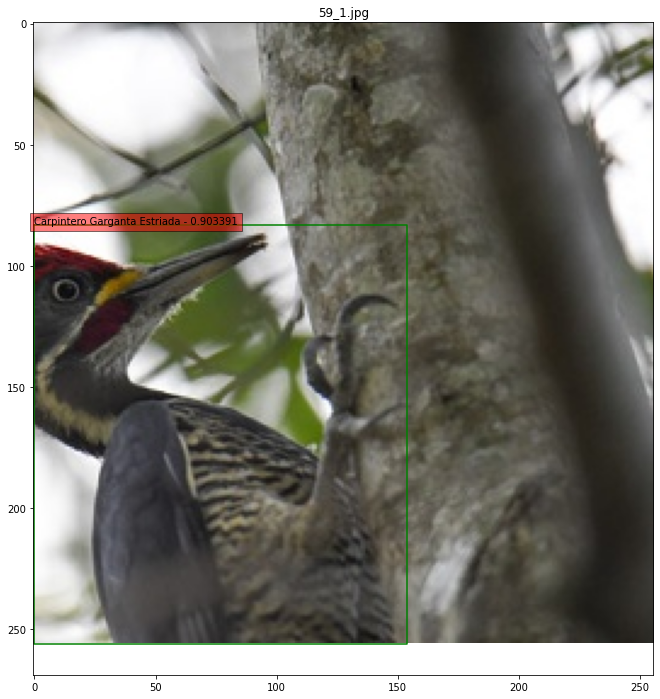

In [28]:
iname = img_names[i]
img_path = '../data/images/test/'
label_path = 'runs/detect/exp/labels/' # ver path en las ultimas lineas de la ejecuci√≥n anterior
plot_boundingbox(iname,img_path,label_path)

## Detecci√≥n en im√°genes de prueba nuevas

Se carga en nuevo directorio la(s) imagen(es) a probar y se corre `detect.py` como se corri√≥ en uno de los pasos anteriores:

In [29]:
%cd ..

/content


In [30]:
# Archivos pueden arrastrarse al √°rea de trabajo o procesarse en local

# Version Online
!wget https://github.com/AxelSkrauba/Taller_IA/raw/main/3_RNA_TransferLearning/OnlyTest_byGoogle.zip

--2022-08-24 03:25:30--  https://github.com/AxelSkrauba/Taller_IA/raw/main/3_RNA_TransferLearning/OnlyTest_byGoogle.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AxelSkrauba/Taller_IA/main/3_RNA_TransferLearning/OnlyTest_byGoogle.zip [following]
--2022-08-24 03:25:30--  https://raw.githubusercontent.com/AxelSkrauba/Taller_IA/main/3_RNA_TransferLearning/OnlyTest_byGoogle.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17612926 (17M) [application/zip]
Saving to: ‚ÄòOnlyTest_byGoogle.zip‚Äô

OnlyTest_byGoogle.z 100%[===================>]  16.80M  --.-KB/s    in 0.04s   

2022-08-24 03

In [ ]:
!unzip OnlyTest_byGoogle.zip

In [32]:
%cd yolov5

/content/yolov5


In [33]:
NEW_PATH_TEST = '../OnlyTest_byGoogle'
TEST_IMAGE    = 'AraneroCoronadoChico51.jpg'

In [34]:
!python detect.py --weights {TEST_WEIGHTS} --img 350 --conf 0.5 --source  {NEW_PATH_TEST} --save-txt  --save-conf

detect: weights=['runs/train/exp/weights/last.pt'], source=../OnlyTest_byGoogle, data=data/coco128.yaml, imgsz=[350, 350], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 üöÄ v6.2-51-ge6f54c5 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20881221 parameters, 0 gradients, 47.9 GFLOPs
image 1/232 /content/OnlyTest_byGoogle/AguilaViuda1.jpg: 256x352 (no detections), 14.7ms
image 2/232 /content/OnlyTest_byGoogle/AguilaViuda10.jpg: 352x352 (no detections), 14.7ms
image 3/232 /content/OnlyTest_byGoogle/AguilaViuda11.jpg: 256x352 1 Aguila Viuda, 12.6ms
image 4/232 /content/OnlyTest_byGoogle/AguilaViuda12.jpg: 256x352 1 Aguila Viuda, 12.5ms


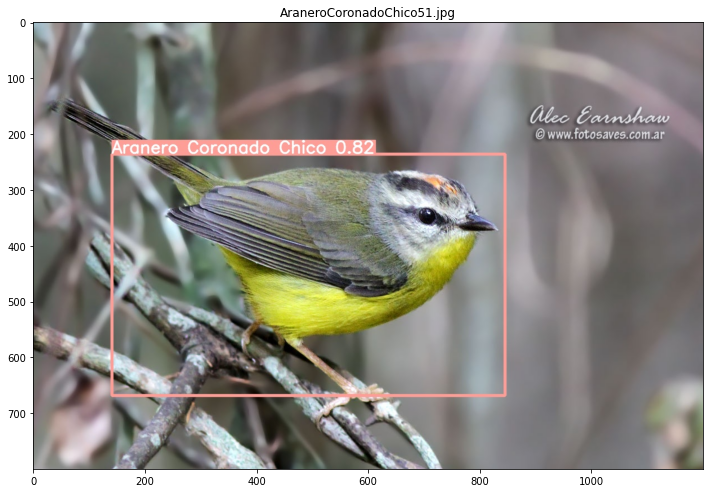

In [35]:
X = cv2.imread('runs/detect/exp2/'+TEST_IMAGE) # ver path en las ultimas lineas de la ejecuci√≥n anterior
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title(TEST_IMAGE)
plt.show()

In [36]:
label_path = 'runs/detect/exp2/labels/' # ver path en las ultimas lineas de la ejecuci√≥n anterior
plot_boundingbox(TEST_IMAGE, NEW_PATH_TEST, label_path)

image: ../OnlyTest_byGoogle/AraneroCoronadoChico51.jpg
 bbox: runs/detect/exp2/labels/AraneroCoronadoChico51.txt


### Visualizaci√≥n en lote del resultado

Charlamos sobre resultados, contextos, alcance del modelo y diferentes porqu√©s...

In [37]:
from random import randint
import cv2


tpath = '../OnlyTest_byGoogle/'
img_names = dirfiles(tpath,'*.jpg')

LIMIT = 10

for i in range(LIMIT):
    img = img_names[randint(0,len(img_names))]
    X = cv2.imread('runs/detect/exp2/'+img) # ver path en las ultimas lineas de la ejecuci√≥n anterior
    plt.figure(figsize=(12,12))
    plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
    plt.title(img)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.